<strong>Importing of required libraries and packages</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
plot_color = sns.color_palette("colorblind")

<strong>Reading CSV file</strong>

In [2]:
df = pd.read_csv("ford.csv")

df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


<strong>Check for missing values and data type</strong>

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

<strong>Function to get number of observation for unique value in a column of Dataframe </strong>

In [4]:
def unique_val_count(data, column):
    df_count = data[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

<strong>Getting number of observation for unique value in a column of Dataframe </strong>

In [5]:
model_count = unique_val_count(df,'model')
year_count = unique_val_count(df,'year')
price_count = unique_val_count(df,'price')
transmission_count = unique_val_count(df,'transmission')
mileage_count = unique_val_count(df,'mileage')
fuelType_count = unique_val_count(df,'fuelType')
mpg_count = unique_val_count(df,'mpg')
engineSize_count = unique_val_count(df,'engineSize')

<strong>Function to show the number of observations for each unique value in a column using a barplot

In [6]:
def barplot(data, column_x, color, rotation, yticks):

    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    plt.title("Number of cars present for each " + column_x)
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    plt.xticks(rotation=rotation)
    plt.yticks(yticks)

<strong> Creating subplots

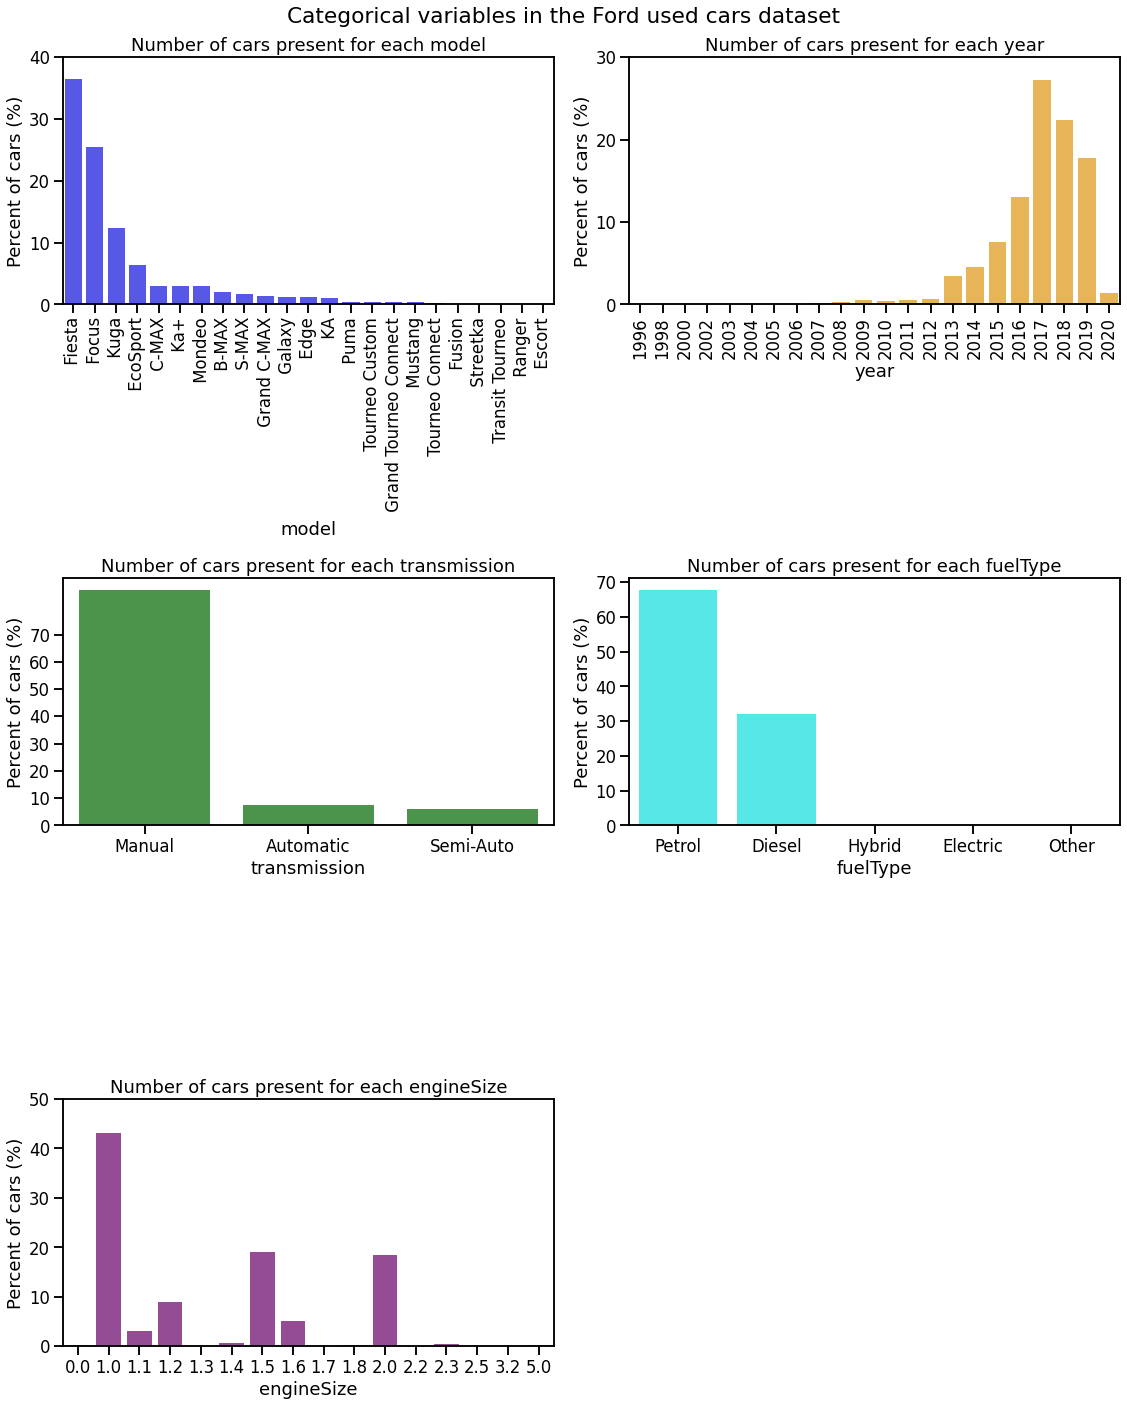

In [7]:
plt.figure(figsize=(16,20))

plt.subplot(3,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,41,10))

plt.subplot(3,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,31,10))

plt.subplot(3,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

plt.subplot(3,2,4)
barplot(fuelType_count, 'fuelType', 'cyan', 0, np.arange(0,71,10))

plt.subplot(3,2,5)
barplot(engineSize_count, 'engineSize', 'purple', 0, np.arange(0,51,10))


plt.suptitle("Categorical variables in the Ford used cars dataset")

plt.tight_layout()

plt.show()

In [8]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


<strong>Scatterplot subplot of all the numeric columns in the dataframe</strong>

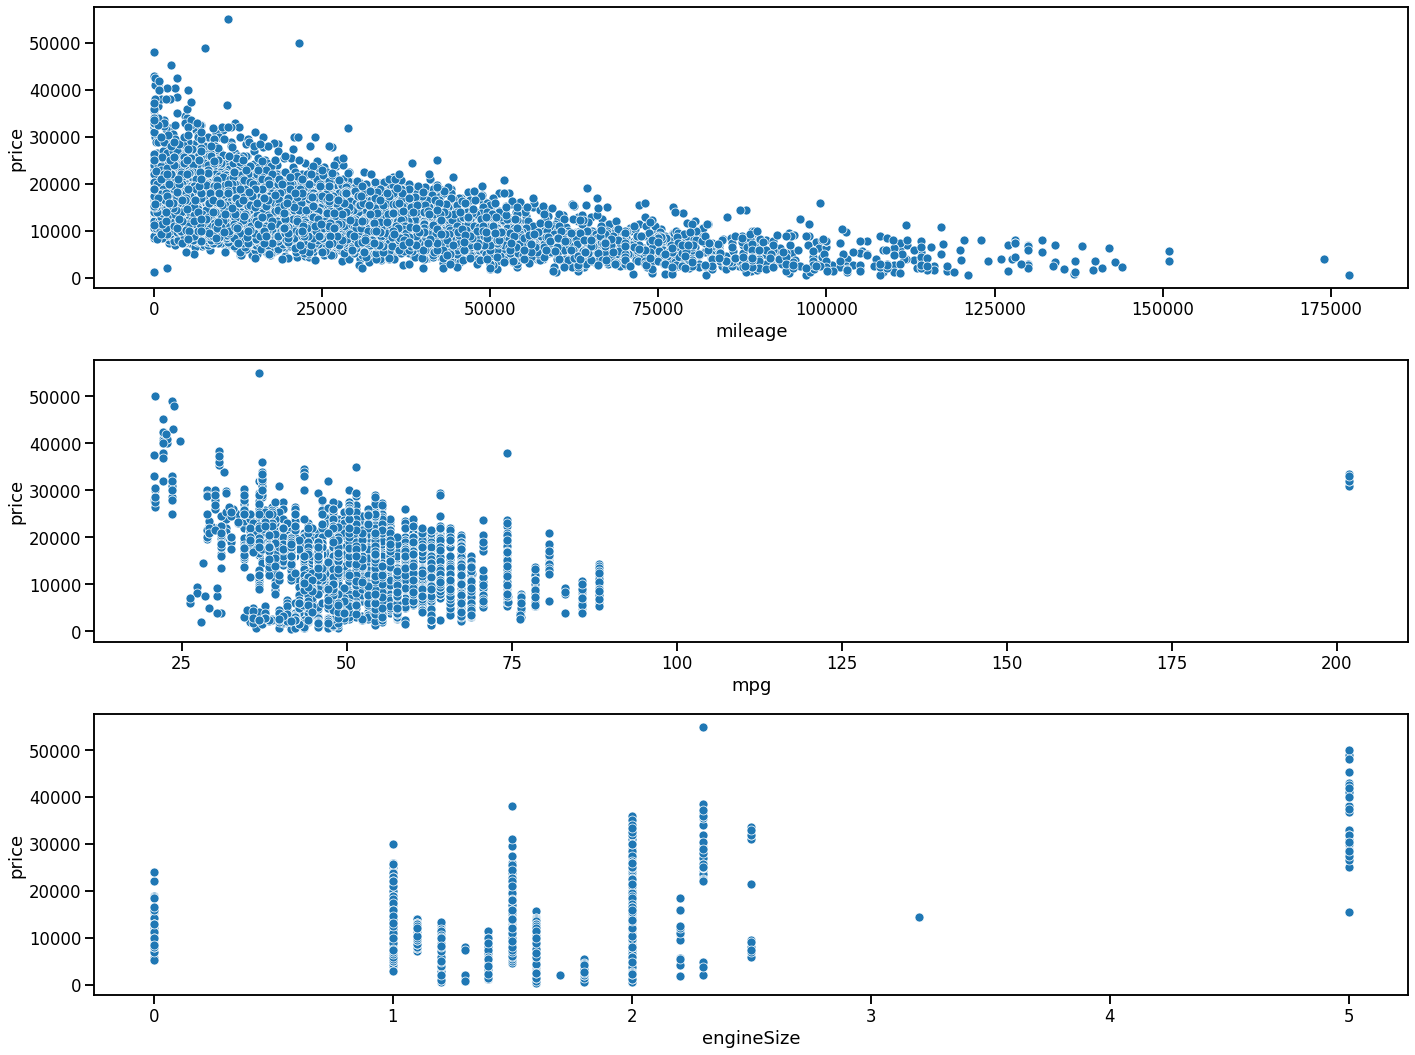

In [9]:
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.scatterplot(x='mileage', y='price', data=df)

plt.subplot(3,1,2)
sns.scatterplot(x='mpg', y='price', data=df)

plt.subplot(3,1,3)
sns.scatterplot(x='engineSize', y='price', data=df)

plt.tight_layout()
plt.show()

<strong> As we cannot determine any pattern from Price and mpg or Price and engineSize subplots. Let us look in depth into the subplot of mileage and price</strong>

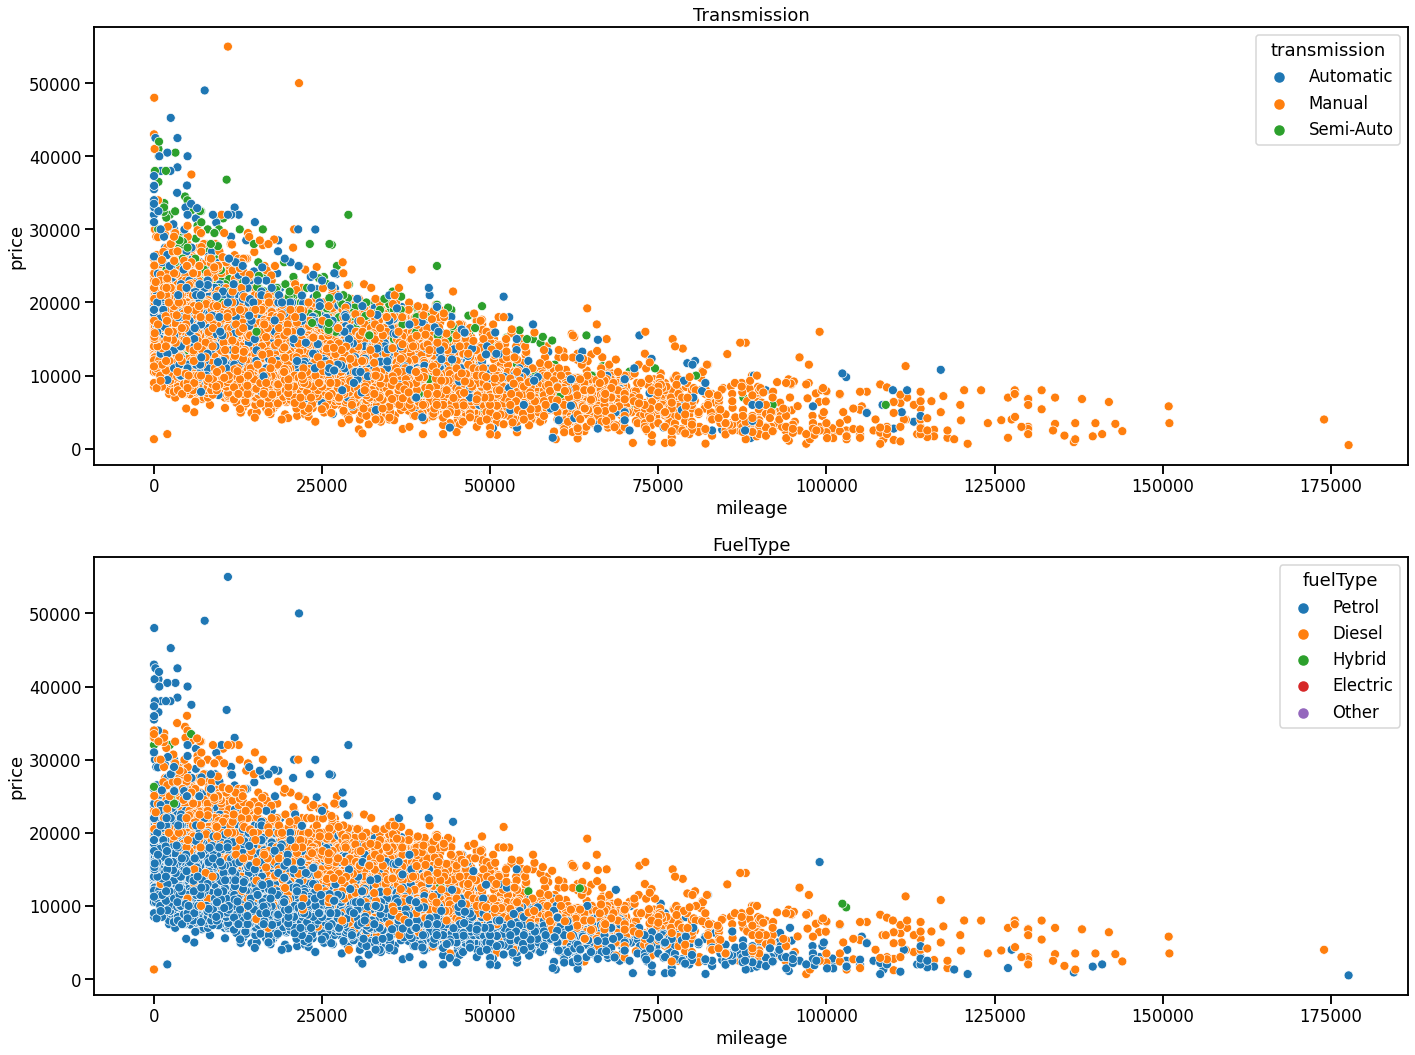

In [10]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
sns.scatterplot(x='mileage', y='price', data=df , hue='transmission')
plt.title('Transmission')


plt.subplot(2,1,2)
sns.scatterplot(x='mileage', y='price', data=df , hue='fuelType')
plt.title('FuelType')


plt.tight_layout()
plt.show()

<strong> On the subplot Transmisson we can see that price of the Manual cars are lowset except for a few outliers, Automatic cars and Semi-auto cars are prices are higher  </strong>

<strong> On the subplot Fueltype we can see that price of the Petrol cars are usually lowset except for a few outliers then Disel cars along with Hybrid cars while Electric and Other cars data is not quite visible since their data sample is low </strong>

<strong>Histogram subplot of all the numeric columns in the dataframe</strong>

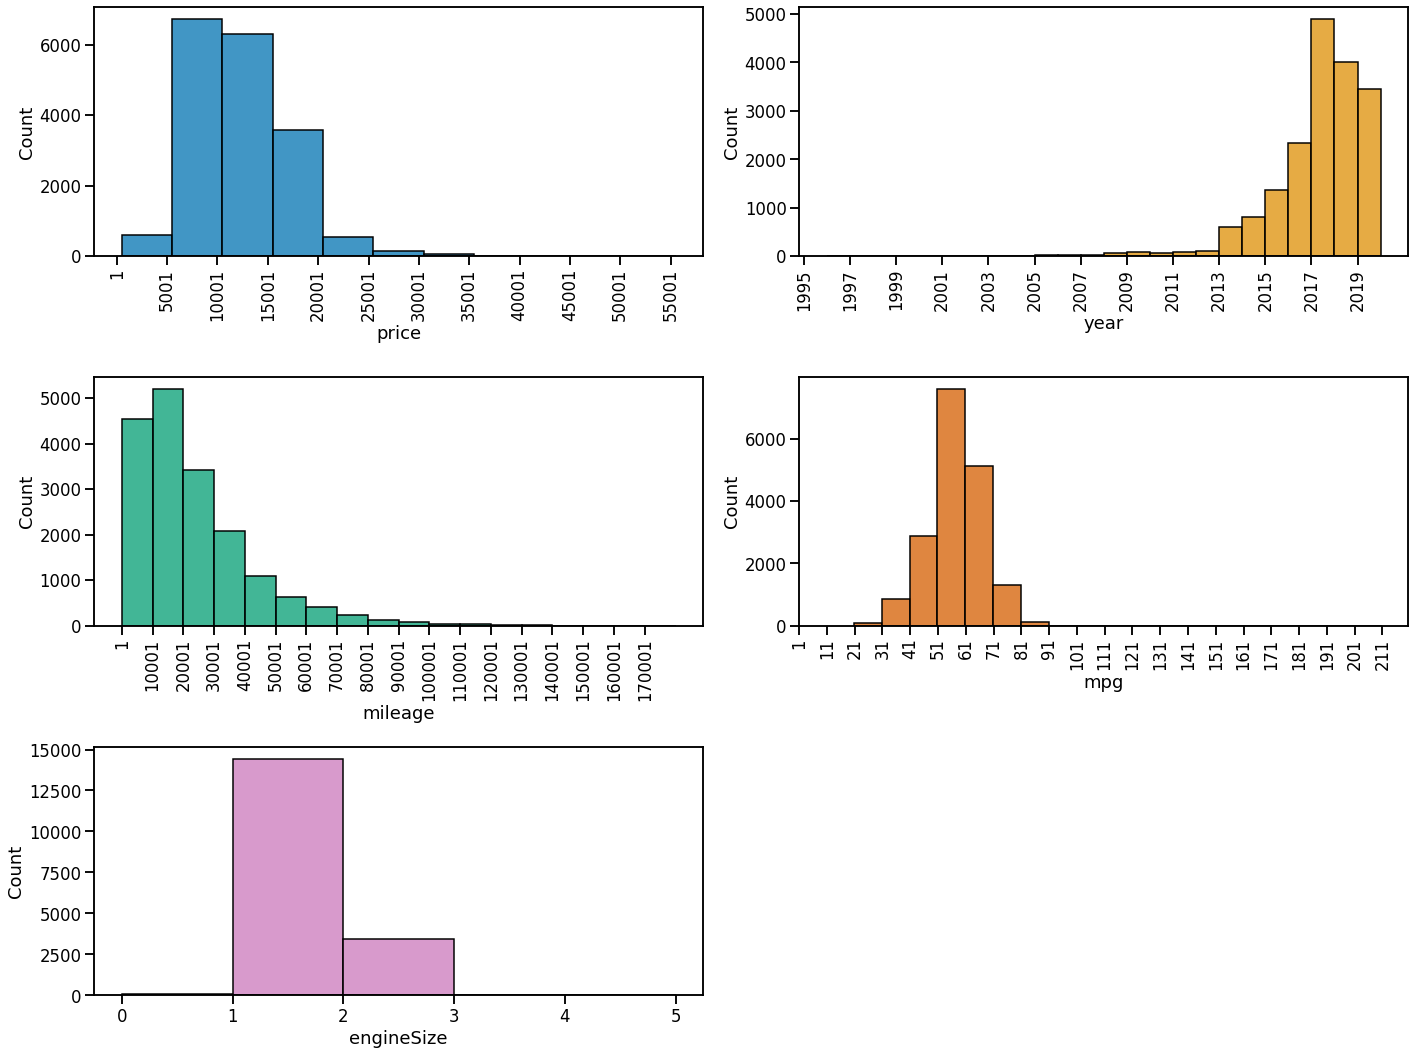

In [11]:
plt.figure(figsize=(20,15))

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.histplot(data=df, x='price', binwidth=5000 , color= plot_color[0])
plt.xticks(np.arange(1,56001,5000), rotation=90)

#subplot row1 column2 year 
plt.subplot(3,2,2)
sns.histplot(data=df, x='year' , binwidth=1, color= plot_color[1])
plt.xticks(np.arange(1995,2021,2), rotation=90)

#subplot row2 column1 milage 
plt.subplot(3,2,3)
sns.histplot(data=df, x='mileage' , binwidth=10000 , color= plot_color[2] )
plt.xticks(np.arange(1,177801,10000), rotation=90)

#subplot row2 column2 miles per gallon 
plt.subplot(3,2,4)
sns.histplot(data=df, x='mpg' , binwidth=10 , color= plot_color[3])
plt.xticks(np.arange(1,212,10), rotation=90)

#subplot row3 column1 engine size
plt.subplot(3,2,5)
sns.histplot(data=df, x='engineSize', binwidth=1 , color= plot_color[4])
plt.xticks(np.arange(0,6,1), rotation=0)


plt.tight_layout()
plt.show()

<strong>Distribution subplot of all the numeric columns in the dataframe</strong>

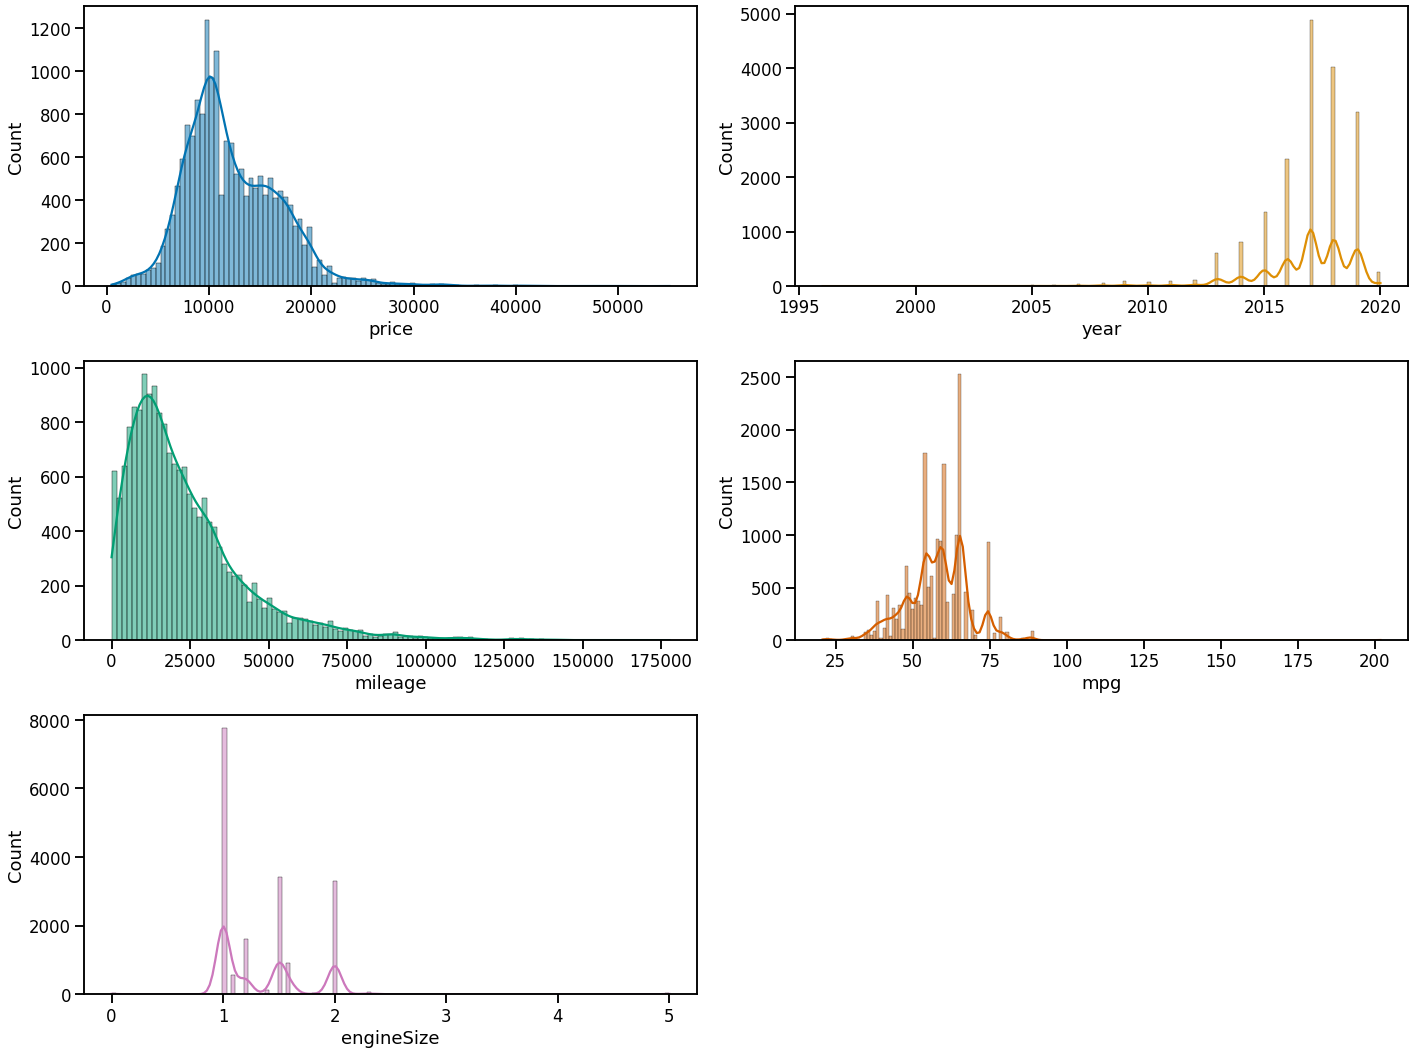

In [12]:
plt.figure(figsize=(20,15))

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.histplot(data=df, x='price', kde=True , color= plot_color[0])

#subplot row1 column2 year 
plt.subplot(3,2,2)
sns.histplot(data=df, x='year' , kde=True , color= plot_color[1])

#subplot row2 column1 milage 
plt.subplot(3,2,3)
sns.histplot(data=df, x='mileage' , kde=True , color= plot_color[2] )

#subplot row2 column2 miles per gallon 
plt.subplot(3,2,4)
sns.histplot(data=df, x='mpg' , kde=True , color= plot_color[3])

#subplot row3 column1 engine size
plt.subplot(3,2,5)
sns.histplot(data=df, x='engineSize', kde=True , color= plot_color[4])


plt.tight_layout()
plt.show()

<strong>By analyzing the distribution subplots we can see that
        
    Distribution of the price column is Unimodal
    Distribution of the year column is Multimodal
    Distribution of the milage column is Unimodal
    Distribution of the mpg column is Multimodal
    Distribution of the engineSize column is Multimodal
</strong>

<strong>Empirical Cumulative Distribution Function, ECDF subplot of all the numeric columns in the dataframe</strong>

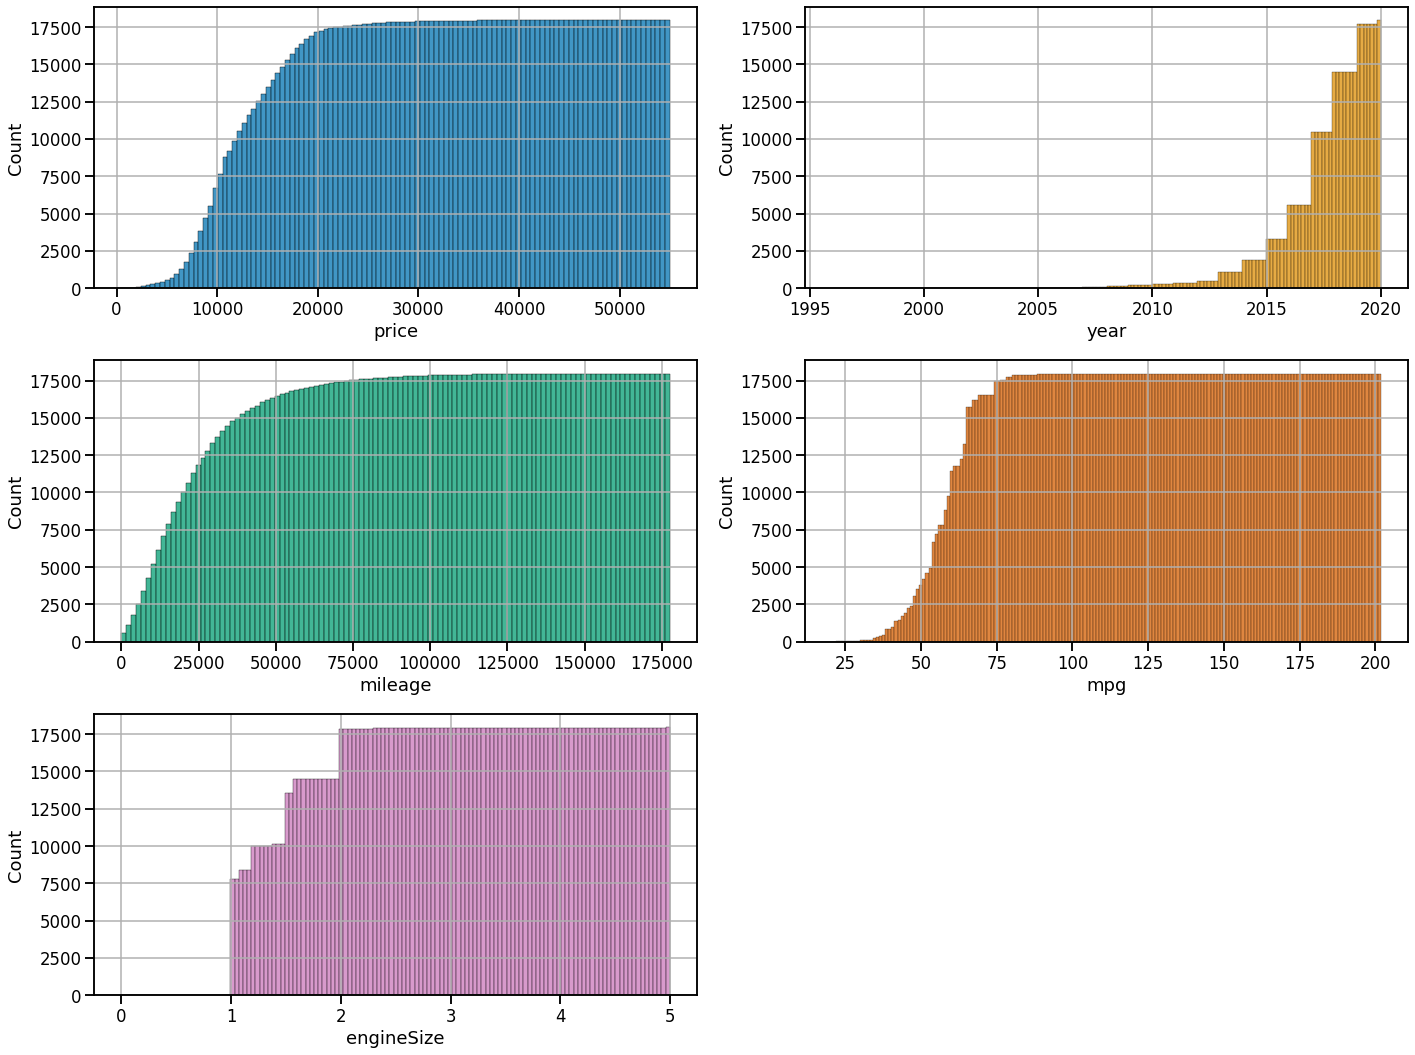

In [17]:
plt.figure(figsize=(20,15))

#subplot row1 column1 price 
plt.subplot(3,2,1)
sns.histplot(data=df, x='price', cumulative=True , color= plot_color[0])
plt.grid()

#subplot row1 column2 year 
plt.subplot(3,2,2)
sns.histplot(data=df, x='year' , cumulative=True , color= plot_color[1])
plt.grid()

#subplot row2 column1 milage 
plt.subplot(3,2,3)
sns.histplot(data=df, x='mileage' , cumulative=True , color= plot_color[2] )
plt.grid()

#subplot row2 column2 miles per gallon 
plt.subplot(3,2,4)
sns.histplot(data=df, x='mpg' , cumulative=True , color= plot_color[3])
plt.grid()

#subplot row3 column1 engine size
plt.subplot(3,2,5)
sns.histplot(data=df, x='engineSize', cumulative=True , color= plot_color[4])
plt.grid()

plt.tight_layout()
plt.show()